<a href="https://colab.research.google.com/github/Gaurav7004/NEWS_ARTICLES_DEPLOYMENT/blob/main/FinBert_DataAnalysis_(Pie_Charts)(_12th_Jan_2022_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

In [46]:
df = pd.read_csv('FinBERT_Predictions.csv', encoding='utf-8')

In [47]:
df.head(3)

,Unnamed: 0,Headline,Positive,Negative,Neutral
0,0,while containment measures will weigh on india...,0.724555,0.248770,0.026675
1,0,the gst intelligence has spotted yet another c...,0.016143,0.913474,0.070383
2,0,"secondly, for macro indicators, deviation of g...",0.035801,0.061664,0.902535


In [48]:
keywords =  ['GST', 'taxes', 'Stock', 'Share market', 'shares', 'GDP', 'gst', 'stock', 'Taxes', 'RBI', 'Reserve Bank of India', 'inflation', 
        'Inflation', 'India Business', 'Indian Economy', 'Export and Import', 'Industrial output', 'EXIM', 'Profit and Loss', 
        'Commodities prices', 'price rise', 'Loans', 'Borrowings', 'financial aid', 'mortgage', 'microfinance', 'Banking regulations', 
        'domestic production', 'GNP', 'non industrial output', 'employment', 'unemployment', 'consumption expenditure', 'allowances', 'pay-cuts', 'recession',
        'Forecasting', 'predictions', 'world bank', 'IMF', 'International Monetary Fund', 'Market volatility', 'Indian currency', 'exchange rates']

## news to list
news = df['Headline'].tolist()

## list to fill required news sentences
lst_reqdWords = []

## Extract required news
for i in range(len(keywords)):
  for j in range(len(news)):
    if keywords[i] in news[j]:
      lst_reqdWords.append(news[j])
    if keywords[i] in news[j]:
      lst_reqdWords.append(news[j])


In [49]:
## Separated and Total rows
len(lst_reqdWords), df.shape[0]

(9597, 14829)

4355
4355


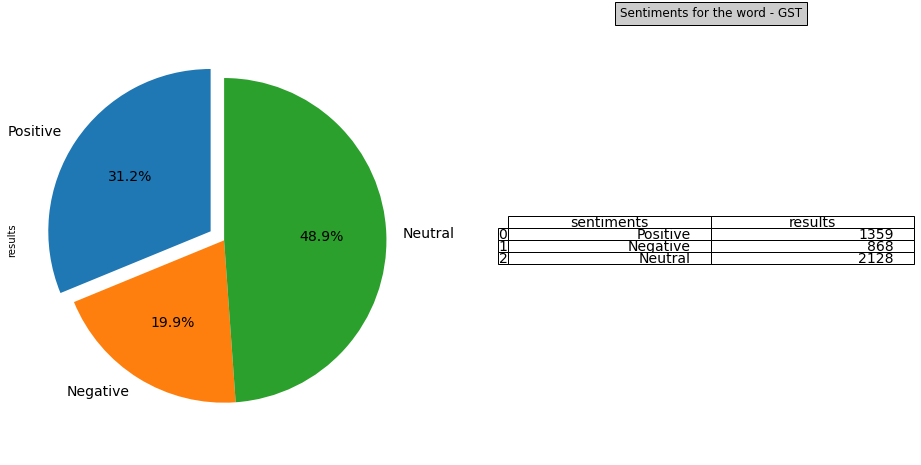

In [52]:
## ONLY for GST ##

## Extract required news having 'gst' or 'GST' keyword
df_gst = df[df['Headline'].str.lower().str.contains('gst') == True]

## Dataframes having gst haing positive, negative, and neutral values
df_gst_pos = df_gst[df_gst['Positive'] >= 0.5]
df_gst_neg = df_gst[df_gst['Negative'] >= 0.5]
df_gst_neu = df_gst[df_gst['Neutral'] >= 0.5]

## Counts +ve, -ve , neutral
cnt_pos = df_gst_pos.shape[0]
cnt_neg = df_gst_neg.shape[0]
cnt_neu = df_gst.shape[0] - (cnt_pos+ cnt_neg)

print(df_gst.shape[0])
print(cnt_pos + cnt_neg  + cnt_neu)

## Raw data dictionary
raw_data = {'sentiments': ['Positive', 'Negative', 'Neutral'],
              'results': [cnt_pos, cnt_neg, cnt_neu]}

## Plot Dataframe
df_for_Plot = pd.DataFrame(raw_data, columns = ['sentiments', 'results'])

#colors = ['red', 'gold', 'yellowgreen', 'blue', 'lightcoral', 'lightskyblue']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# explode 1st slice
explode = (0.1, 0, 0) 

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_for_Plot.plot(kind='pie', y = 'results', ax=ax1, autopct='%1.1f%%', explode=explode, colors=colors,
 startangle=90, shadow=False, labels=df_for_Plot['sentiments'], legend = False, fontsize=14)

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, df_for_Plot, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.title("Sentiments for the word - GST", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


In [18]:
df_gst.columns

Index(['Unnamed: 0', 'Headline', 'Positive', 'Negative', 'Neutral'], dtype='object')

In [ ]:
# ### List to append required sentences
# req_list_of_df_row = []

# for i in range(0, len(df.iloc[i])):
#     for j in range(0, len(keywords)):
#         if string_lst[j] in x[i]:
#             # print('x List: ', x[i])
#             # print('string_lst : ', string_lst[j])
#             req_list_of_df_row.append(x[i])
#         else:
#             pass

In [ ]:
''' EXAMPLE '''
###############

import re

## Our keywords
string_lst = ['fun of me', 'dum', 'sun', 'gum fun']

## Our Row 
x = ["I love to have fun of me.", "dum dfg", "sun rise", "gum fun wan", "this sun", "dum fun", "asdf", "qwert"]

# print(re.findall(r"(?=("+'|'.join(string_lst)+r"))", x))

### List to append required sentences
req_list_of_df_row = []

for i in range(0, len(x)):
    for j in range(0, len(string_lst)):
        if string_lst[j] in x[i]:
            # print('x List: ', x[i])
            # print('string_lst : ', string_lst[j])
            req_list_of_df_row.append(x[i])
        else:
            pass

print(req_list_of_df_row)